In [ ]:
%matplotlib inline
#%matplotlib nbagg # JupyterLabでは上手く動かないので今回は使わない。
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
import numpy as np
from matplotlib.animation import ArtistAnimation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import Audio
import random

import sympy as sym
# Jupyter Notebook上で、レンダリングされた結果を表示する
sym.init_printing()

In [ ]:
def fse(func, n, start, T):
    fig = plt.figure(figsize=(6,20)) # サイズを横長にしたほうが見やすい。

    dx = 0.01
    x = np.arange(start, T, dx)
    y_base = func(x)
    a0 = 2 * np.average(y_base)
    y_ave = np.array([a0 / 2 for xi in x]) # 同じ値を並べてるだけ

    for i in range(1, n+1):
        ax = fig.add_subplot(n,1,i)

        cos_ = [np.cos(2*np.pi*j*x/T) for j in range(1, i+1)]
        sin_ = [np.sin(2*np.pi*j*x/T) for j in range(1, i+1)]

        a_ = ((2/T)*np.dot(cos_, y_base)*dx).reshape(-1, 1)
        b_ = ((2/T)*np.dot(sin_, y_base)*dx).reshape(-1, 1)

        y_cos_ = a_ * cos_
        y_sin_ = b_ * sin_
        y_total = y_ave + np.sum(y_cos_ + y_sin_, axis=0)

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['left'].set_position('zero')
        ax.plot(x, y_base, label='base_function') # 描画
        ax.plot(x, y_ave, label='ave') # 描画
        ax.plot(x, y_total, label=f'total n={i}', color='red') # 描画
        ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10) # ラベルの反映

    plt.show()
    return fig

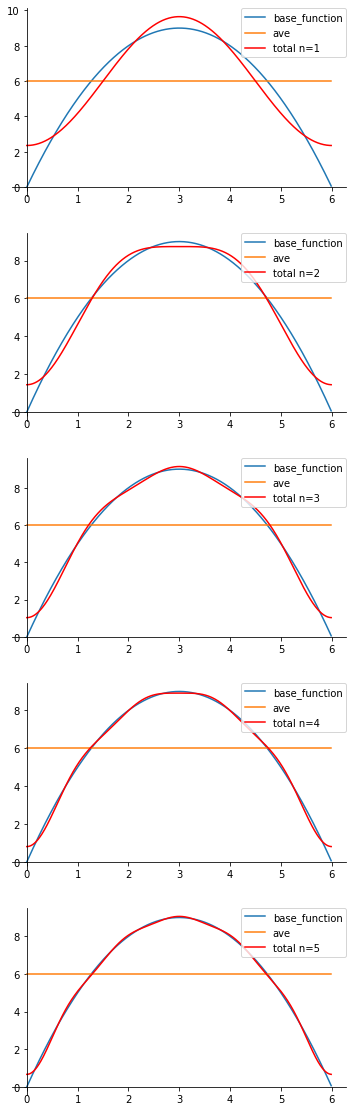

In [ ]:
fig = fse(lambda x: -(x - 3) ** 2 + 9, 5, 0, 6.0)

In [ ]:
fig.savefig('stop.svg')

In [ ]:
def fse_ani(func, n, start, T):
    fig = plt.figure(figsize=(6,4)) # サイズを横長にしたほうが見やすい。
    ax = fig.add_subplot(1,1,1)

    dx = 0.01
    x = np.arange(start, T, dx)
    y_base = func(x)
    a0 = 2 * np.average(y_base)
    y_ave = np.array([a0 / 2 for xi in x]) # 同じ値を並べてるだけ

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.plot(x, y_base, label='base_function') # 描画
    ax.plot(x, y_ave, label='ave') # 描画

    def fse(func, n, start, T):
        cos_ = [np.cos(2*np.pi*i*x/T) for i in range(1, n+1)]
        sin_ = [np.sin(2*np.pi*i*x/T) for i in range(1, n+1)]

        a_ = ((2/T)*np.dot(cos_, y_base)*dx).reshape(-1, 1)
        b_ = ((2/T)*np.dot(sin_, y_base)*dx).reshape(-1, 1)

        y_cos_ = a_ * cos_
        y_sin_ = b_ * sin_
        y_total = y_ave + np.sum(y_cos_ + y_sin_, axis=0)

        art = ax.plot(x, y_total, color='red') # 描画
    
        return art

    artist_list = []
    for i in range(1, n+1):
        artist_list.append(fse(func, i, start, T))

    ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10) # ラベルの反映
    ani = ArtistAnimation(fig, artist_list, interval = 1000)

    plt.close()
    return ani

In [ ]:
ani = fse_ani(lambda x: -(x - 3) ** 2 + 9, 5, 0, 6.0)
HTML(ani.to_jshtml())

In [ ]:
ani.save('./ani.mp4', writer="ffmpeg")

In [ ]:
ani = fse_ani(lambda x: np.where(x < np.pi, 0, 1), 12, 0, 2*np.pi)
HTML(ani.to_jshtml())

In [ ]:
ani.save('./anisqu.mp4', writer="ffmpeg")